In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la

## Non power positive projection matrix

In [27]:
f0= 0
f1= 2
p1= 0.5

A=np.array([[f0,f1],[p1 ,0]])
print(A)

[[0.  2. ]
 [0.5 0. ]]


We want to compute A A (matrix power of A with itself)

In [28]:
B = np.dot(A,A)
print(B)

[[1. 0.]
 [0. 1.]]


More flexible syntax within numpy, so can compute any matrix power

In [29]:
C= np.linalg.matrix_power(A, 2)
print(C)

[[1. 0.]
 [0. 1.]]


Based on this we expect will **not** have a single dominant eigenvalue, and that's what we find

In [30]:
l, v = la.eig(A)
print(l)

[ 1.+0.j -1.+0.j]


Let's simulate it!

In [31]:
Tmax=20

n_vs_t=np.zeros([2,Tmax])
n_zero=np.array([2900,9000])
n_vs_t[:,0]=n_zero 


In [32]:
for t in np.arange(Tmax-1):
    n_vs_t[:,t+1]=np.dot(A,n_vs_t[:,t])

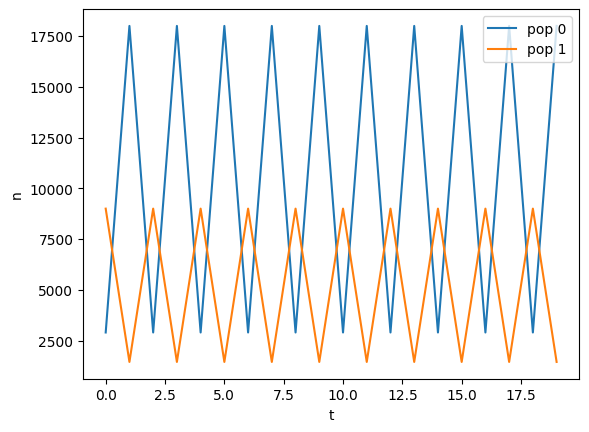

In [33]:
generation_arr=np.arange(Tmax)
plt.plot(generation_arr,n_vs_t[0,:],label="pop 0")
plt.plot(generation_arr,n_vs_t[1,:],label="pop 1")
plt.xlabel('t')
plt.ylabel('n')
plt.legend()